# Noisets Examples:

In [1]:
import numpy as np
import noisets
from noisets import noisettes as ns

## Load the data

In this notebook, we are interested in the YFV data, published in 2019 by M.Pogorelyy. 

In [2]:
path = '../../Data-sets/Yellow_fever/'
filename1 = 'S1_0_F1_.txt' # first biological replicate
filename2 = 'S1_0_F2_.txt' # second biological replicate
mincount = 0 # always put 0 here (prefered) to extract the whole data-set and then modify it
maxcount = np.inf # always put np.inf here (prefered) to extract the whole data-set and then modify it
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

- Create an object that will be associate to a particular patient, for two dates of interest. In this notebook, we are focused on the null-model learning. So on, "time_1" and "time_2" will be exactlyt the same. For the case of the null-model learning,the two time points refer to two different biological samples.

In [3]:
cl_S1 = ns.Data_Process(path, filename1, filename2, mincount, maxcount, colnames1,  colnames2)
print("First Filename is : " , cl_S1.filename1)
print("Second Filename is : ",  cl_S1.filename2)
print("Name of the columns of first file are : ", cl_S1.colnames1)
print("Name of the columns of second file are : ", cl_S1.colnames2)
print("Minimum count is ", cl_S1.mincount)
print("Maximum count is ", cl_S1.maxcount)

First Filename is :  S1_0_F1_.txt
Second Filename is :  S1_0_F2_.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Minimum count is  0
Maximum count is  inf


- Create the data-frame 

In [4]:
n, df = cl_S1.import_data()

In [5]:
df

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.007298,0.006993,7000.0,5646.0,TGCGCCAGCAGCCCCCAGTTCACAGGCTCCTACGAGCAGTACTTC,CASSPQFTGSYEQYF
1,0.004135,0.003625,3966.0,2927.0,TGTGCCAGCAGTTCCCCCATAGCGGGACAAAGCTCCTACGAGCAGT...,CASSSPIAGQSSYEQYF
2,0.003358,0.003473,3221.0,2804.0,TGCAGTGCTTCTCTTGCGTCGGGCACCGGGGAGCTGTTTTTT,CSASLASGTGELFF
3,0.002515,0.002272,2412.0,1834.0,TGTGCCAGCAGTTACGGACAGGGCAATCAGCCCCAGCATTTT,CASSYGQGNQPQHF
4,0.002389,0.002308,2292.0,1863.0,TGTGCCAGCAGTTGGGGACAGGGGGTAAACGAGCAGTACTTC,CASSWGQGVNEQYF
...,...,...,...,...,...,...
1037495,0.000000,0.000001,0.0,1.0,TGTGCCACAAGAC,CA_QD
1037496,0.000000,0.000001,0.0,1.0,TGAGCTGTTTTTT,*A_FF
1037497,0.000000,0.000001,0.0,1.0,TGTGCTCTTTTA,CALL
1037498,0.000000,0.000001,0.0,1.0,TGTGCCCCTTTC,CAPF


- Visualization of the data

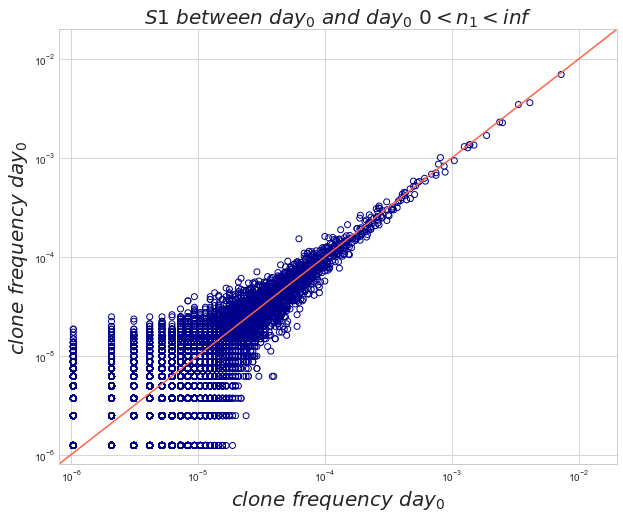

In [6]:
# All the persistent clones between the two samples 
cl_S1.scatter_plot(0, np.inf, 'day', '0', '0', 'S1') #see the documentation for the input variables

## Null-model learning

In [6]:
sparse_rep = cl_S1.get_sparserep(df) # explain what is exactly sparse_rep, the center object of all the inference 

In [7]:
indn1,indn2,sparse_rep_counts,unicountvals_1,unicountvals_2, NreadsI, NreadsII = sparse_rep 

In [14]:
acq_model_type = 2 # Negative Binomial + Poisson for MP
#other models :
# 0 : NB + Poisson
# 1 : Poisson + NB 
# 2 : NB
# 3 : Poisson
init_paras_arr_S1 = [ np.asarray([ -2.046736,    1.539405,    1.234712,    6.652190,  -9.714225]), \
                    np.asarray([ -2.07585556,   2.33165493,  -0.34198692,   6.53797226,-10.58516877]), \
                    np.asarray([-2.02192528,   0.45220384,   1.06806274, -10.18866972]), \
                     np.asarray([-2.15206189,  -9.46699067])
                 ]
init_paras = init_paras_arr_S1[acq_model_type]

In [15]:
null_model = ns.RNAUMIs_NoiseModel() #YFV are RNAseq data

In [17]:
init_paras = [-2.0, 2, 2, -11]
null_model.learn_null_model(sparse_rep, acq_model_type, init_paras, constr_type=1)

Iter      alph_rho  beta      alpha     fmin      
1 -1.884179 1.989855 1.591458 -10.971619 
1.7210227482422418
2 -1.917579 1.991386 1.248674 -10.953411 
1.6853861738605025
3 -1.953126 1.983707 1.347292 -10.956171 
1.688246977762109
4 -2.041148 1.978698 1.129450 -10.941071 
1.6811271829670642
5 -2.413276 1.923160 0.678705 -10.901679 
2.345589418177274
6 -2.042271 1.963246 1.229259 -10.943235 
1.6743189391691566
7 -2.065663 1.936264 1.205475 -10.937050 
1.6734380517697904
8 -2.065194 1.921391 1.206906 -10.935466 
1.6735329569875472
9 -2.059268 1.819479 1.201847 -10.923076 
1.6721566993457828
10 -2.045484 1.294666 1.158753 -10.858421 
1.6667888625068716
11 -2.038111 0.907904 1.096398 -10.810414 
1.6630753653905899
12 -2.050377 0.753988 1.051818 -10.791830 
1.6617036693258869
13 -2.059444 0.601211 1.015824 -10.773354 
1.661406478535827
14 -2.060744 0.581936 1.007864 -10.771988 
1.661380847041453
15 -2.060512 0.569761 1.004620 -10.770277 
1.6613808725632129
16 -2.059732 0.563424 1.003027 -

(     fun: 1.6613800391488205
      jac: array([-0.0007415 ,  0.00024296, -0.00098091, -0.00016136])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 18
     njev: 18
   status: 0
  success: True
        x: array([ -2.05990578,   0.57709116,   1.00669378, -10.77126499]),
 1.2442050037833043e-07,
 1.6613800391488205)

Text(0, 0.5, '$Loss \\ function$')

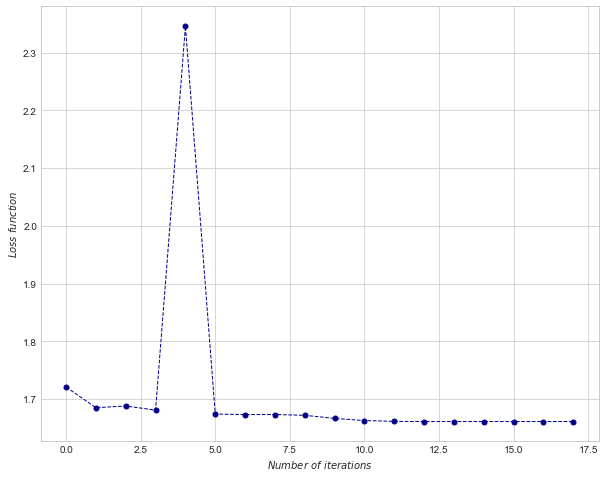

In [18]:
Loss_function = [1.7210227482422418, 1.6853861738605025, 1.688246977762109, 1.6811271829670642, 2.345589418177274, 1.6743189391691566, 1.6734380517697904, 1.6735329569875472, 1.6721566993457828, 1.6667888625068716, 1.6630753653905899, 1.6617036693258869, 1.661406478535827, 1.661380847041453, 1.6613808725632129, 1.6613833102547724, 1.661383065821305, 1.6613800391488205    ]
plt.figure(figsize= (10,8))
plt.style.use('seaborn-whitegrid')

n_iter = np.arange(len(Loss_function))
plt.plot(n_iter, Loss_function, marker = 'o', markersize = 5, linestyle = '--', linewidth =1, color = 'DarkBlue')
plt.xlabel(r'$Number \ of \ iterations$')
plt.ylabel(r'$Loss \ function$')